In [1]:
import requests as rs
import json
import pandas as pd

In [2]:
print("Welcome to the weather  app")
city=["jaipur","mumbai","delhi","ganganagar","gopalganj","patna","goa","manipal","hisar","chandigarh"]
temp=[]
weather=[]
maxtemp=0
for i in range(len(city)):
    
    link=rs.get("http://api.openweathermap.org/data/2.5/weather?q="+ city[i] +"&APPID=80719280b7fa73dc1af0e1b3ccec621f").content
    data=json.loads(link)
    t=data["main"]["temp"]
    w=data["weather"][0]["main"]
    weather.append(w)
    t=t-273
    temp.append(int(t))
    
# #     temp=("%.2f" % temp)
#     print(city[i],temp)
#     if maxtemp<temp:
#         maxtemp=temp
#         hottestcity=city[i]
# print(hottestcity + " is hottest city having ",maxtemp)

Welcome to the weather  app


In [3]:
weather

['Haze',
 'Clear',
 'Haze',
 'Clouds',
 'Clouds',
 'Haze',
 'Rain',
 'Clouds',
 'Clear',
 'Clouds']

In [4]:
temp

[44, 33, 43, 44, 37, 41, 28, 33, 44, 42]

In [5]:
city

['jaipur',
 'mumbai',
 'delhi',
 'ganganagar',
 'gopalganj',
 'patna',
 'goa',
 'manipal',
 'hisar',
 'chandigarh']

In [6]:
df=pd.DataFrame({"city":city,"temp":temp,"weather":weather})

In [7]:
df

,city,temp,weather
0,jaipur,44,Haze
1,mumbai,33,Clear
2,delhi,43,Haze
3,ganganagar,44,Clouds
4,gopalganj,37,Clouds
5,patna,41,Haze
6,goa,28,Rain
7,manipal,33,Clouds
8,hisar,44,Clear
9,chandigarh,42,Clouds


In [8]:
df.weather.unique()
info=[]
for u in df.weather.unique():
    info.append(df[df.weather==u])

In [9]:
df1=df[df["weather"]=="Haze"]

In [10]:
df2=df[df["weather"]=="Clouds"]

In [11]:
df3=df[df["weather"]=="Clear"]

In [12]:
info[1]

,city,temp,weather
1,mumbai,33,Clear
8,hisar,44,Clear


In [13]:
import matplotlib.pyplot as plt

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

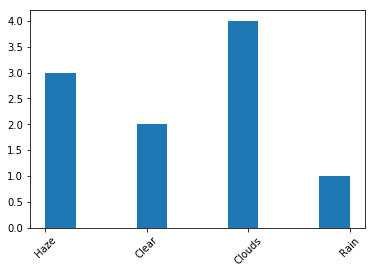

In [14]:
plt.hist(weather)
# plt.xlabel("cities")
# plt.ylabel("no. of cities")
plt.xticks(rotation=45)

([<matplotlib.patches.Wedge at 0x11875ba20>,
 [Text(0.33991867422268784, 1.0461621742897658, 'Clouds'),
  Text(-1.0461621424642782, -0.3399187721714579, 'Haze'),
  Text(0.3399188211458418, -1.0461621265515308, 'Clear'),
  Text(1.0461622140716127, -0.33991855178672087, 'Rain')],
 [Text(0.1854101859396479, 0.5706339132489631, '40.0%'),
  Text(-0.5706338958896062, -0.18541023936624976, '30.0%'),
  Text(0.18541026607955005, -0.5706338872099259, '20.0%'),
  Text(0.5706339349481523, -0.1854101191563932, '10.0%')])

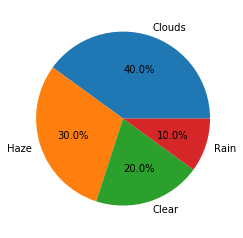

In [15]:
plt.pie(df.weather.value_counts(),labels=df.weather.value_counts().index,autopct="%1.1f%%")

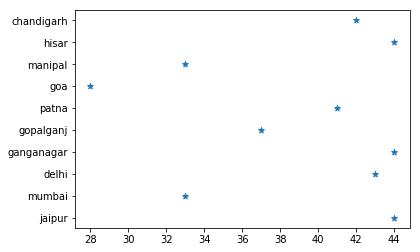

In [16]:
plt.scatter(temp,city,marker="*")

In [22]:
plt.pie(temp, label=df.temp.values().index)

TypeError: 'numpy.ndarray' object is not callable

In [46]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Temp')

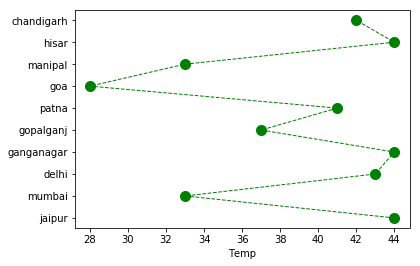

In [38]:
plt.plot(temp,city,linestyle="dashed",marker="o",color="green", linewidth="1", markersize=10)
plt.xlabel("Temp")

In [41]:
import seaborn as sns

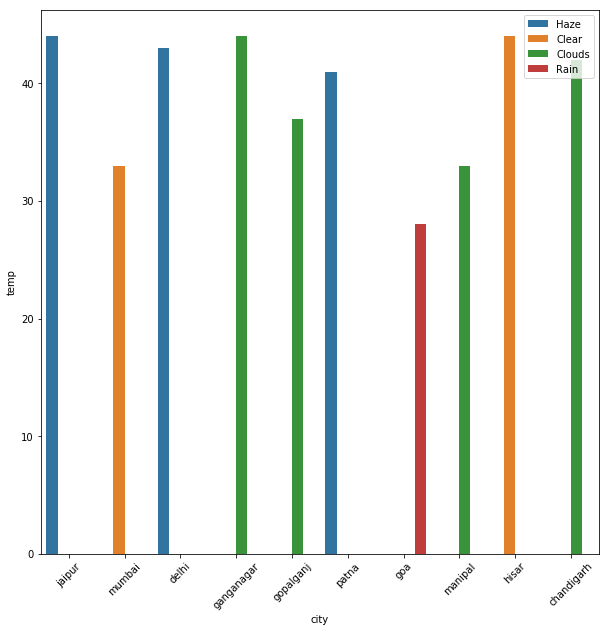

In [60]:

plt.figure(figsize=(10,10))
sns.barplot(df.city,df.temp,hue=df.weather)
plt.xticks(rotation=45)
plt.legend(loc="upper right")

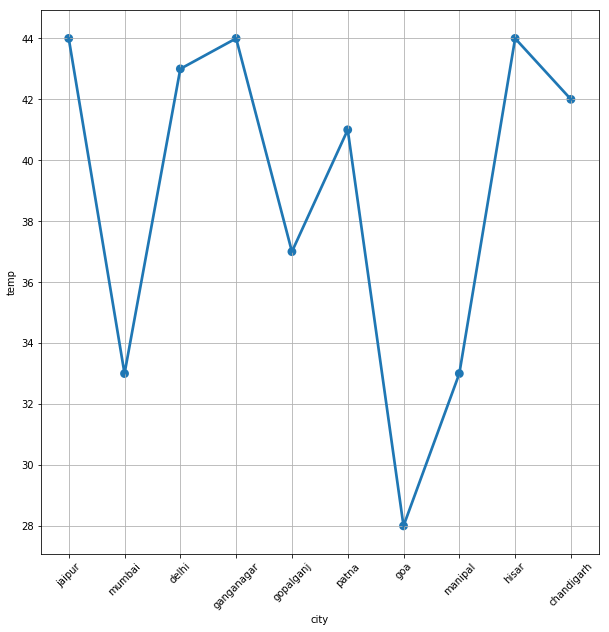

In [61]:
plt.figure(figsize=(10,10))
sns.pointplot(df.city,df.temp)
plt.xticks(rotation=45)
plt.grid()

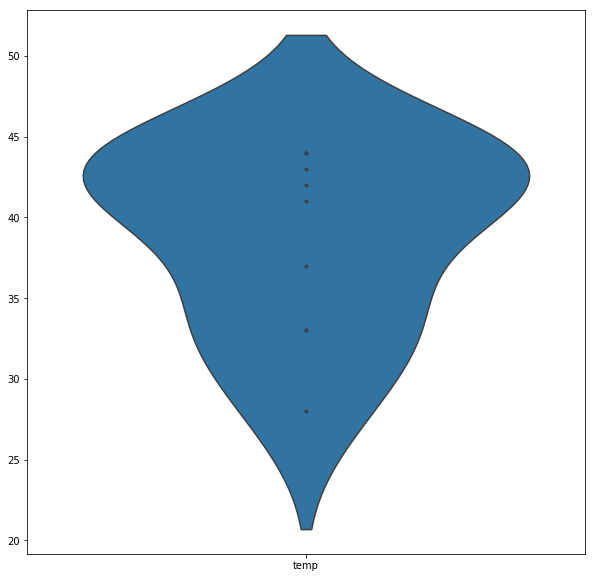

In [67]:
plt.figure(figsize=(10,10))

sns.violinplot(data=df,inner="points")

In [75]:
t=(df["temp"]).copy()
w=df["weather"].copy()

In [77]:
type(w)

pandas.core.series.Series

In [84]:
dt=pd.DataFrame({"temp":t,"weather":w})

In [79]:
w

0      Haze
1     Clear
2      Haze
3    Clouds
4    Clouds
5      Haze
6      Rain
7    Clouds
8     Clear
9    Clouds
Name: weather, dtype: object

In [85]:
df

,city,temp,weather
0,jaipur,44,Haze
1,mumbai,33,Clear
2,delhi,43,Haze
3,ganganagar,44,Clouds
4,gopalganj,37,Clouds
5,patna,41,Haze
6,goa,28,Rain
7,manipal,33,Clouds
8,hisar,44,Clear
9,chandigarh,42,Clouds


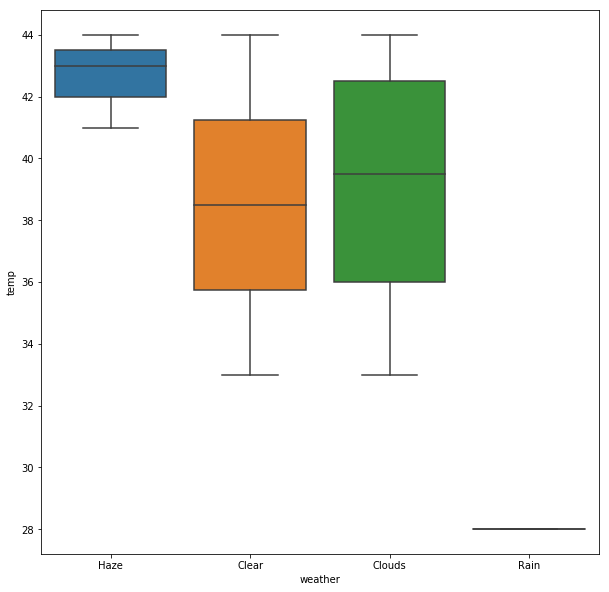

In [93]:
plt.figure(figsize=(10,10))

sns.boxplot(x="weather", y="temp",data=df)

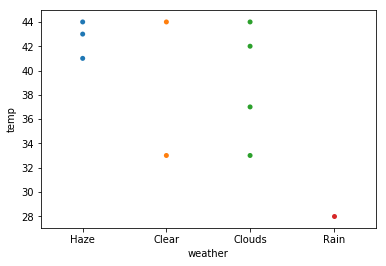

In [100]:
sns.swarmplot(x=df.weather,y=df.temp,data=df)

In [107]:
dt["tem"]=dt["temp"]-20

In [108]:
dt["tem"]

0    24
1    13
2    23
3    24
4    17
5    21
6     8
7    13
8    24
9    22
Name: tem, dtype: int64

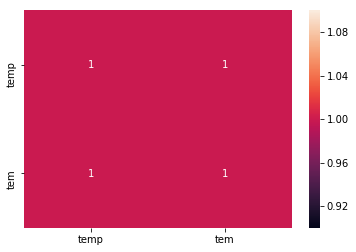

In [111]:
sns.heatmap(dt.corr(),annot=True)